In [92]:
import os
import statistics
from typing import Dict, Tuple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [93]:
def load_csv_results():
    normal_scenarios = ["feature_importance", "operator_impact", "data_corruption", "data_cleaning"]
    image_scenarios = ["data_corruption", "data_cleaning"]
    normal_datasets = ["healthcare", "folktables", "cardio", "reviews"]
    image_dataset = ["sneakers"]
    data_loadings = ["fast_loading", "slow_loading"]
    featurizations = ["featurization_0", "featurization_1", "featurization_2", "featurization_3", "featurization_4"]
    models = ["logistic_regression", "xgboost", "neural_network"]
    result_df = None
    for scenario in normal_scenarios:
        for dataset in normal_datasets:
            for data_loading in data_loadings:
                for featurization in featurizations:
                    for model in models:
                        filepath = f"{os.getcwd()}/end-to-end-benchmark-results/" \
                                   f"results-{scenario}-{dataset}-{data_loading}-{featurization}-{model}.csv"
                        new_df = pd.read_csv(filepath)
                        new_df['median_no_opt'] = new_df['total_exec_duration_without_opt'].median()
                        new_df['median_opt'] = new_df['total_exec_duration_with_opt'].median()
                        new_df['median_speedup'] = new_df['median_no_opt'] / new_df['median_opt']
                        new_df['opt_original_pipeline_estimated'] = new_df['opt_original_pipeline_estimated'].median()

                        new_df['median_model_training_opt'] = new_df['opt_original_pipeline_model_training'].median() \
                                                              + new_df['opt_what_if_execution_combined_model_training'].median()
                        new_df['median_model_training_no_opt'] = new_df['opt_original_pipeline_model_training'].median() \
                                                              + new_df['no_opt_what_if_execution_combined_model_training'].median()
                        new_df['median_opt_wo_training'] = new_df['median_opt'] - new_df['median_model_training_opt']
                        new_df['median_no_opt_wo_training'] = new_df['median_no_opt'] - \
                                                              new_df['median_model_training_no_opt']
                        new_df['median_speedup_excluding_model_training'] = new_df['median_no_opt_wo_training'] / \
                                                                            new_df['median_opt_wo_training']

                        # for column in new_df.columns:
                        #     if column.startswith("analysis_result"):
                        #         new_df[column] = median_no_opt / new_df[column].median()
                        new_df['variant_count_including_orig'] = new_df['variant_count'] + 1
                        new_df['max_possible_speedup'] = new_df['variant_count_including_orig'] / 2
                        new_df = new_df[['median_no_opt', 'median_opt', 'median_speedup',
                                         'median_speedup_excluding_model_training',
                                         'opt_original_pipeline_estimated', 'variant_count_including_orig',
                                         'max_possible_speedup', 'scenario', 'dataset',
                                         'data_loading', 'featurization', 'model']]
                        new_df = new_df.head(1)
                        new_df = new_df.round(2)
                        if result_df is None:
                            result_df = new_df
                        else:
                            result_df = pd.concat([result_df, new_df], axis=0)
    for scenario in image_scenarios:
        for dataset in image_dataset:
            for data_loading in data_loadings:
                for featurization in ["image"]:
                    for model in ["image"]:
                        filepath = f"{os.getcwd()}/end-to-end-benchmark-results/" \
                                   f"results-{scenario}-{dataset}-{data_loading}-{featurization}-{model}.csv"
                        new_df = pd.read_csv(filepath)
                        median_no_opt = new_df['total_exec_duration_without_opt'].median()
                        new_df['median_no_opt'] = median_no_opt
                        median_opt = new_df['total_exec_duration_with_opt'].median()
                        new_df['median_opt'] = median_opt
                        median_speedup = median_no_opt / median_opt
                        new_df['median_speedup'] = median_speedup
                        new_df['opt_original_pipeline_estimated'] = new_df['opt_original_pipeline_estimated'].median()

                        new_df['median_model_training_opt'] = new_df['opt_original_pipeline_model_training'].median() \
                                                              + new_df['opt_what_if_execution_combined_model_training'].median()
                        new_df['median_model_training_no_opt'] = new_df['opt_original_pipeline_model_training'].median() \
                                                              + new_df['no_opt_what_if_execution_combined_model_training'].median()
                        new_df['median_opt_wo_training'] = new_df['median_opt'] - new_df['median_model_training_opt']
                        new_df['median_no_opt_wo_training'] = new_df['median_no_opt'] - \
                                                              new_df['median_model_training_no_opt']
                        new_df['median_speedup_excluding_model_training'] = new_df['median_no_opt_wo_training'] / \
                                                                            new_df['median_opt_wo_training']
                        # for column in new_df.columns:
                        #     if column.startswith("analysis_result"):
                        #         new_df[column] = median_no_opt / new_df[column].median()
                        new_df['variant_count_including_orig'] = new_df['variant_count'] + 1
                        new_df['max_possible_speedup'] = new_df['variant_count_including_orig'] / 2
                        new_df = new_df[['median_no_opt', 'median_opt', 'median_speedup',
                                         'median_speedup_excluding_model_training',
                                         'opt_original_pipeline_estimated', 'variant_count_including_orig',
                                         'max_possible_speedup', 'scenario', 'dataset',
                                         'data_loading', 'featurization', 'model']]
                        new_df = new_df.head(1)
                        new_df = new_df.round(2)
                        if result_df is None:
                            result_df = new_df
                        else:
                            result_df = pd.concat([result_df, new_df], axis=0)
    return result_df

In [94]:
median_results = load_csv_results()

In [95]:
median_results_ordered_by_median_speedup = median_results.sort_values(by=['median_speedup'])
median_results_ordered_by_median_speedup.to_csv(f"{os.getcwd()}/end-to-end-benchmark-results/end_to_end_speedup_"
                                                f"overview_ordered_by_median_speedup.csv", index=True)
median_results_ordered_by_median_speedup

,median_no_opt,median_opt,median_speedup,median_speedup_excluding_model_training,opt_original_pipeline_estimated,variant_count_including_orig,max_possible_speedup,scenario,dataset,data_loading,featurization,model
0,2763.77,2793.40,0.99,0.94,1299.16,2,1.0,operator_impact,folktables,fast_loading,featurization_0,logistic_regression
0,5882.25,5957.65,0.99,0.90,2835.64,2,1.0,operator_impact,folktables,slow_loading,featurization_0,neural_network
0,797.82,801.97,0.99,0.99,312.69,2,1.0,operator_impact,cardio,fast_loading,featurization_0,logistic_regression
0,9703.17,9770.97,0.99,0.92,4730.74,2,1.0,operator_impact,cardio,slow_loading,featurization_0,neural_network
0,5671.23,5677.00,1.00,1.00,2742.52,2,1.0,operator_impact,folktables,fast_loading,featurization_0,neural_network
...,...,...,...,...,...,...,...,...,...,...,...,...
0,62042.05,4381.22,14.16,14.02,1981.64,31,15.5,data_corruption,healthcare,slow_loading,featurization_4,xgboost
0,71130.94,5002.80,14.22,13.55,2227.19,31,15.5,data_corruption,healthcare,fast_loading,featurization_1,neural_network
0,61162.43,4292.14,14.25,14.14,1963.06,31,15.5,data_corruption,healthcare,slow_loading,featurization_0,xgboost
0,54050.80,3793.19,14.25,14.25,1733.78,31,15.5,data_corruption,healthcare,fast_loading,featurization_0,logistic_regression


In [96]:
median_results_ordered_by_median_speedup_excluding_model_training = median_results\
    .sort_values(by=['median_speedup_excluding_model_training'])
median_results_ordered_by_median_speedup_excluding_model_training.to_csv(f"{os.getcwd()}/end-to-end-benchmark-results/"
                                                                         f"end_to_end_speedup_overview_ordered_by_"
                                                                         f"median_speedup_excluding_model_training.csv",
                                                                         index=True)
median_results_ordered_by_median_speedup_excluding_model_training

,median_no_opt,median_opt,median_speedup,median_speedup_excluding_model_training,opt_original_pipeline_estimated,variant_count_including_orig,max_possible_speedup,scenario,dataset,data_loading,featurization,model
0,5882.25,5957.65,0.99,0.90,2835.64,2,1.0,operator_impact,folktables,slow_loading,featurization_0,neural_network
0,9703.17,9770.97,0.99,0.92,4730.74,2,1.0,operator_impact,cardio,slow_loading,featurization_0,neural_network
0,2763.77,2793.40,0.99,0.94,1299.16,2,1.0,operator_impact,folktables,fast_loading,featurization_0,logistic_regression
0,2880.00,2875.01,1.00,0.96,1338.85,2,1.0,operator_impact,folktables,slow_loading,featurization_0,logistic_regression
0,8356.44,8381.56,1.00,0.97,4094.82,2,1.0,operator_impact,folktables,slow_loading,featurization_0,xgboost
...,...,...,...,...,...,...,...,...,...,...,...,...
0,55856.29,3975.56,14.05,14.05,1787.01,31,15.5,data_corruption,healthcare,slow_loading,featurization_2,logistic_regression
0,54479.90,3864.05,14.10,14.10,1750.04,31,15.5,data_corruption,healthcare,fast_loading,featurization_1,logistic_regression
0,61162.43,4292.14,14.25,14.14,1963.06,31,15.5,data_corruption,healthcare,slow_loading,featurization_0,xgboost
0,54050.80,3793.19,14.25,14.25,1733.78,31,15.5,data_corruption,healthcare,fast_loading,featurization_0,logistic_regression


In [97]:
def speedup_scatter_plot(data, title, x_column, y_column, groupby_column):
    unique_groupby_values = list(data[groupby_column].unique())
    unique_groupby_values.sort()
    colors = ['tab:green', 'tab:blue', 'tab:red', 'tab:orange', 'tab:pink', 'tab:purple']
    colors_and_values = list(zip(colors, unique_groupby_values))
    fig, ax = plt.subplots()
    for color, groupby_value in colors_and_values:
        filtered_data = data[data[groupby_column] == groupby_value]
        x = filtered_data[x_column]
        y = filtered_data[y_column]
        ax.scatter(x, y, c=color, label=groupby_value,
                   alpha=1., edgecolors='none')

    plt.plot([0, 45], [0, 22.5], '--', color='grey', label='limit')

    ax.legend(fontsize=15, ncol=1)
    ax.grid(True)
    plt.ylabel('speedup', fontsize=26)
    plt.ylim(0, 22.5)
    plt.xlabel('# variants', fontsize=26)
    plt.xlim(0, 45)

    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)

    plt.gcf().set_size_inches(8, 6)
    plt.tight_layout()

    current_directory = os.getcwd()
    output_directory = os.path.join(current_directory, r'figures')
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    plt.gcf().savefig(f'./figures/{title}.pdf', dpi=300)
    plt.show()

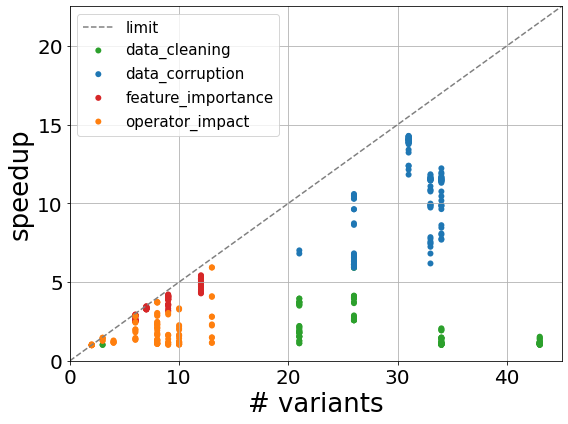

In [98]:
speedup_scatter_plot(median_results, 'speedups_per_scenario', 'variant_count_including_orig', 'median_speedup', 'scenario')

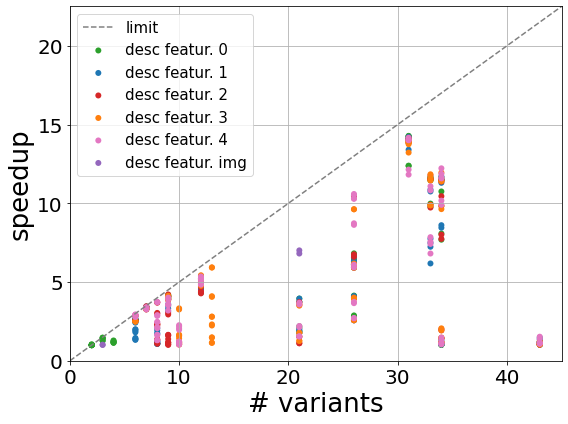

In [99]:
color_map = {
    'featurization_0': 'desc featur. 0',
    'featurization_1': 'desc featur. 1',
    'featurization_2': 'desc featur. 2',
    'featurization_3': 'desc featur. 3',
    'featurization_4': 'desc featur. 4',
    'image': 'desc featur. img'
}
pretty_featurization_desc = median_results.copy(deep=True)
pretty_featurization_desc['featurization'] = pretty_featurization_desc['featurization'].map(color_map)
speedup_scatter_plot(pretty_featurization_desc, 'speedups_per_featurization', 'variant_count_including_orig', 'median_speedup', 'featurization')

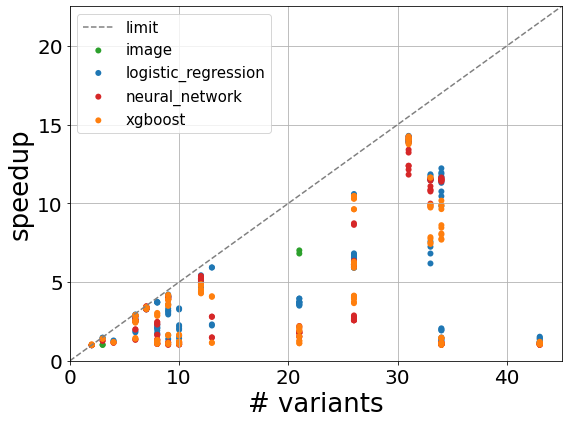

In [100]:
speedup_scatter_plot(pretty_featurization_desc, 'speedups_per_model', 'variant_count_including_orig', 'median_speedup', 'model')

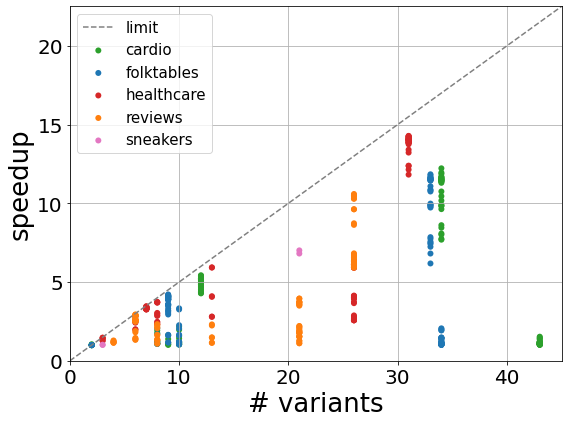

In [101]:
speedup_scatter_plot(pretty_featurization_desc, 'speedups_per_dataset', 'variant_count_including_orig', 'median_speedup', 'dataset')

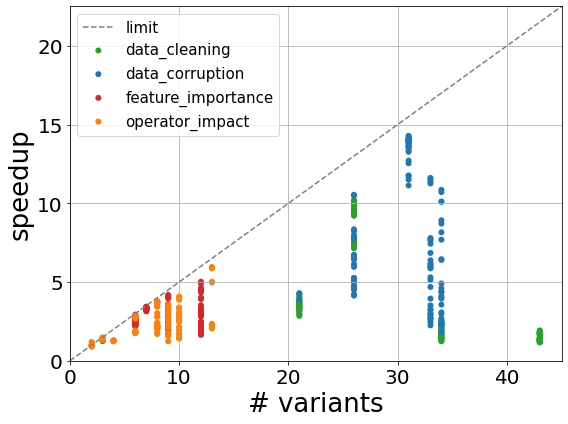

In [102]:
speedup_scatter_plot(median_results, 'speedups_per_scenario_excluding_model_training', 'variant_count_including_orig', 'median_speedup_excluding_model_training', 'scenario')

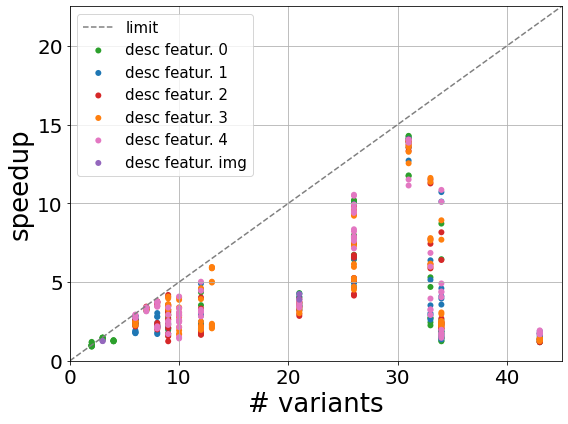

In [103]:
color_map = {
    'featurization_0': 'desc featur. 0',
    'featurization_1': 'desc featur. 1',
    'featurization_2': 'desc featur. 2',
    'featurization_3': 'desc featur. 3',
    'featurization_4': 'desc featur. 4',
    'image': 'desc featur. img'
}
pretty_featurization_desc = median_results.copy(deep=True)
pretty_featurization_desc['featurization'] = pretty_featurization_desc['featurization'].map(color_map)
speedup_scatter_plot(pretty_featurization_desc, 'speedups_per_featurization_excluding_model_training', 'variant_count_including_orig', 'median_speedup_excluding_model_training', 'featurization')


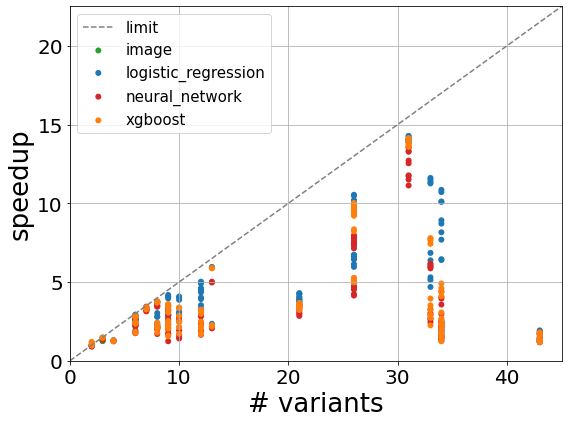

In [104]:
speedup_scatter_plot(pretty_featurization_desc, 'speedups_per_model_excluding_model_training', 'variant_count_including_orig', 'median_speedup_excluding_model_training', 'model')

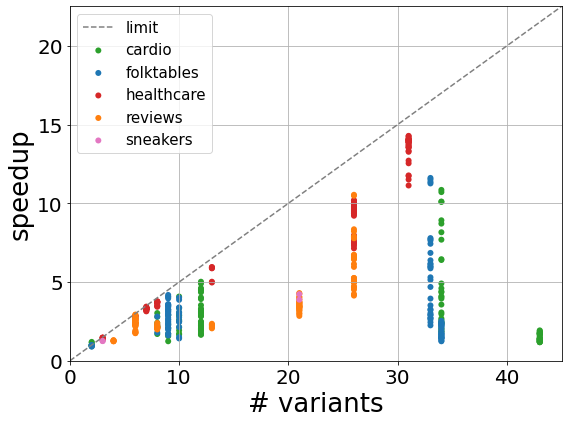

In [105]:
speedup_scatter_plot(pretty_featurization_desc, 'speedups_per_dataset_excluding_model_training', 'variant_count_including_orig', 'median_speedup_excluding_model_training', 'dataset')

